<div style="width: 38.5%;">
    <p><strong>City College of San Francisco</strong><p>
    <hr>
    <p>MATH 108 - Foundations of Data Science</p>
</div>

# Lecture 14: Chance and Probability

Associated Textbook Sections: [9.4, 9.5](https://inferentialthinking.com/chapters/09/4/Monty_Hall_Problem.html)

<h2>Set Up the Notebook<h2>

In [1]:
from datascience import *
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

## The Monty Hall Problem

### Monty Hall Problem

* There are 3 closed doors.
* One door has a prize and two doors have what is consider not to be a prize.
* The contestant selects a door.
* The host reveals what is behind the remaining door that has not be selected without the prize.
* The contestant has the chance to change doors.
* Are the contestant's chance of winning improved by switching doors?
<img src="./img/Monty_open_door.png" width = 40%>

Image Source: [Wikipedia - Monty Hall Problem](https://en.wikipedia.org/wiki/Monty_Hall_problem)

### Demo: Monty Hall

Create a simulation of the Monty Hall game.

In [31]:
def other_goat(a_goat):
    '''other_goat accepts either the string 'first goat' or the string 'second goat' and returns the other goat as a string.'''
    if a_goat == 'first goat':
        return 'second goat'
    elif a_goat == 'second goat':
        return 'first goat'
    else:
        print("a_goat should name 'first goat' or 'second goat'.")

In [32]:
other_goat('first goat')

'second goat'

In [33]:
def monty_hall():
    '''
    monty_hall runs a simulation of the monty hall problem 
    where the three doors are represented as the strings 'first goat',
    'second goat', and 'car'. This function returns a list with random 
    choice from the contestant, the goat revealed by the host, and the remaining car/goat.
    '''
    doors = make_array('car', 'first goat', 'second goat')
    goats = make_array('first goat', 'second goat')
    contestant_choice = np.random.choice(doors)
    
    if contestant_choice == 'first goat':
        monty_choice = 'second goat'
        remaining_door = 'car'
        
    elif contestant_choice == 'second goat':
        monty_choice = 'first goat'
        remaining_door = 'car'
        
    elif contestant_choice == 'car':
        monty_choice = np.random.choice(goats)
        remaining_door = other_goat(monty_choice)
        
    return [contestant_choice, monty_choice, remaining_door]

In [35]:
monty_hall()

['car', 'first goat', 'second goat']

Store the results of several random simulations of the Monty Hall game in a Table.

In [40]:
games = Table(['Guess', 'Revealed', 'Remaining'])

In [41]:
games.append(monty_hall())

Guess,Revealed,Remaining
first goat,second goat,car


In [44]:
games = Table(['Guess', 'Revealed', 'Remaining'])

for _ in range(3000):
    games = games.with_row(monty_hall())
    
games

Guess,Revealed,Remaining
first goat,second goat,car
second goat,first goat,car
car,second goat,first goat
second goat,first goat,car
second goat,first goat,car
first goat,second goat,car
first goat,second goat,car
car,first goat,second goat
car,first goat,second goat
car,second goat,first goat


Determine the proportion of times that the player would have won if they switched doors.

In [10]:
...

Ellipsis

## Probability

### Basics

* Lowest value: 0 (or 0%) --- Chance of event that is impossible.
* Highest value: 1 (or 100%) --- Chance of event that is certain.
* Complement: If an event has chance 70%, then the chance that it doesn’t happen is:
    * 100% - 70% = 30%
    * 1 - 0.7 = 0.3


### Equally Likely Outcomes

Assuming all outcomes are equally likely, the chance of an event $A$ is:
                
$$P(A) = \frac{\text{number of outcomes that make $A$ happen}}{\text{total number of outcomes}}$$
                             


### A Question

* Set Up:
    * There are three cards: ace of hearts, king of diamonds, and queen of spades.
    * The cards are shuffled and two cards are drawn at random without replacement.
* What is the chance that I get the Queen followed by the King?

In [11]:
...

Ellipsis

### An Interpretation

[One way](https://en.wikipedia.org/wiki/Frequentist_probability) to interpret that there is an approximately 16.67% chance of selecting a Queen followed by a King is to say that if the situation was repeated many many times, the calculated proportion of Queen-King outcomes narrows in on the value of 0.1667.

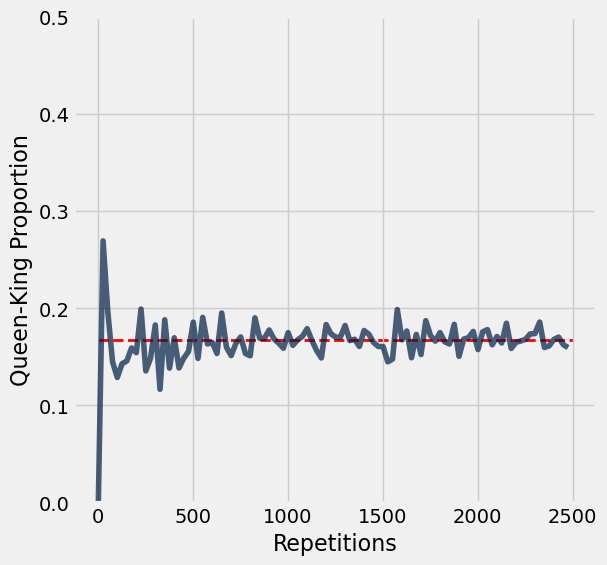

In [12]:
# Simulation parameters
cards = ['A', 'K', 'Q']
max_reps = 2500
steps = 25
successes = make_array()

# Simulate the situation -- Takes a few seconds to run
for reps in np.arange(1, max_reps + 1, steps):
    outcomes = make_array()
    for _ in np.arange(reps - 1):
        random_outcome = np.random.choice(cards, 2, replace=False)
        first_card = random_outcome.item(0)
        second_card = random_outcome.item(1)
        if first_card == 'Q' and second_card == 'K':
            outcomes = np.append(outcomes, True)
        else:
            outcomes = np.append(outcomes, False)
    successes = np.append(successes, sum(outcomes) / reps)

# Visualize the Results
Table().with_columns('Repetitions', np.arange(1, max_reps + 1, steps),
                     'Queen-King Proportion', successes).plot('Repetitions')
plots.plot([0, max_reps], [0.167, 0.167], 'r--', linewidth=2, zorder=-1)
plots.ylim(0, 0.5)
plots.show()

### Multiplication Rule

* Chance that two events $A$ and $B$ both happen is $P(\text{$A$ happens}) \times P(\text{$B$ happens given that $A$ has happened})$
* The answer is less than or equal to each of the two chances being multiplied
* The more conditions you have to satisfy, the less likely you are to satisfy them all


### Another Question

* Set up:
    * There are three cards: ace of hearts, king of diamonds, and queen of spades.
    * The cards are shuffled and two cards are drawn at random without replacement.
* What is the chance that one of the cards I draw is a King and the other is Queen?


### Demo: Addition Rule

In [13]:
outcomes = make_array('AK', 'AQ', 'KQ', 'KA', 'QA', 'QK')
first_card = make_array('A', 'A', 'K', 'K', 'Q', 'Q')
second_card = make_array('K', 'Q', 'Q', 'A', 'A', 'K')
Table().with_columns('First Card', first_card,
                     'First Card Chance', np.ones(6) / 3,
                     'Second Card', second_card,
                     'Second Card Chance', np.ones(6) / 2,
                     'Outcome', outcomes,
                     'Outcome Chance', np.ones(6) / 6
                    )

First Card,First Card Chance,Second Card,Second Card Chance,Outcome,Outcome Chance
A,0.333333,K,0.5,AK,0.166667
A,0.333333,Q,0.5,AQ,0.166667
K,0.333333,Q,0.5,KQ,0.166667
K,0.333333,A,0.5,KA,0.166667
Q,0.333333,A,0.5,QA,0.166667
Q,0.333333,K,0.5,QK,0.166667


Notice that there are two rows (possibilities) with the outcome of interest.

In [14]:
...

Ellipsis

### Addition Rule

* If event $A$ can happen in exactly one of two ways, then $P(A)  =   P(\text{first way})  +  P(\text{second way})$
* The answer is greater than or equal to the chance of each individual way

### Complement: At Least ...

What is the chance of getting at least one head in a certain number of flips of a fair coin?
* In 3 tosses:
    At least one head means any outcome except $TTT$
    * $P(TTT)  =  (1/2) \times (1/2) \times (1/2)  =  (1/2)^{3}$
    * $P(\text{at least one head}) = 1 - P(TTT) = 1 - (1/2)^{3} = 87.5\% $                                           
* In 10 tosses: $P(\text{at least one head}) = 1 - (1/2)^{10} \approx 99.9\%$


In [15]:
...

Ellipsis

<footer>
    <hr>
    <p>Adopted from UC Berkeley DATA 8 course materials.</p>
    <p>This content is offered under a <a href="https://creativecommons.org/licenses/by-nc-sa/4.0/">CC Attribution Non-Commercial Share Alike</a> license.</p>
</footer>